# Environment Setup and Dataset download
Run the following code snippets to setup the envs

Download the Netflix Subscription dataset from this [link](https://drive.google.com/file/d/1optmRfNfXUFSTWY2l4FAod6aiYl4y91P/view?usp=sharing) using your IIT account and upload to the this session storage.

In [ ]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [2]:
import pyspark
import pyspark.sql  as pyspark_sql
import pyspark.sql.types as pyspark_types
import pyspark.sql.functions  as pyspark_functions
from pyspark import SparkContext, SparkConf

In [3]:
# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = pyspark_sql.SparkSession.builder.getOrCreate()

# Dataframe Ops

In [5]:
# Load the dataset
data = spark.read.csv("Netflix subscription fee Dec-2021.csv", header=True, inferSchema=True)

In [6]:
data.printSchema()

root
 |-- Country_code: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Total Library Size: integer (nullable = true)
 |-- No_of_TVShows: integer (nullable = true)
 |-- No_of_Movies: integer (nullable = true)
 |-- Cost Per Month - Basic ($): double (nullable = true)
 |-- Cost Per Month - Standard ($): double (nullable = true)
 |-- Cost Per Month - Premium ($): double (nullable = true)



In [7]:
data.show()

+------------+----------+------------------+-------------+------------+--------------------------+-----------------------------+----------------------------+
|Country_code|   Country|Total Library Size|No_of_TVShows|No_of_Movies|Cost Per Month - Basic ($)|Cost Per Month - Standard ($)|Cost Per Month - Premium ($)|
+------------+----------+------------------+-------------+------------+--------------------------+-----------------------------+----------------------------+
|          ar| Argentina|              4760|         3154|        1606|                      3.74|                          6.3|                        9.26|
|          au| Australia|              6114|         4050|        2064|                      7.84|                        12.12|                       16.39|
|          at|   Austria|              5640|         3779|        1861|                      9.03|                        14.67|                       20.32|
|          be|   Belgium|              4990|        

In [8]:
data.printSchema()

root
 |-- Country_code: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Total Library Size: integer (nullable = true)
 |-- No_of_TVShows: integer (nullable = true)
 |-- No_of_Movies: integer (nullable = true)
 |-- Cost Per Month - Basic ($): double (nullable = true)
 |-- Cost Per Month - Standard ($): double (nullable = true)
 |-- Cost Per Month - Premium ($): double (nullable = true)



In [9]:
data.describe('Cost Per Month - Premium ($)').show()

+-------+----------------------------+
|summary|Cost Per Month - Premium ($)|
+-------+----------------------------+
|  count|                          65|
|   mean|          15.612923076923078|
| stddev|           4.040672408104298|
|    min|                        4.02|
|    max|                       26.96|
+-------+----------------------------+



In [10]:
# used to serialize the data and convert to a regular python variable
data.collect()

[Row(Country_code='ar', Country='Argentina', Total Library Size=4760, No_of_TVShows=3154, No_of_Movies=1606, Cost Per Month - Basic ($)=3.74, Cost Per Month - Standard ($)=6.3, Cost Per Month - Premium ($)=9.26),
 Row(Country_code='au', Country='Australia', Total Library Size=6114, No_of_TVShows=4050, No_of_Movies=2064, Cost Per Month - Basic ($)=7.84, Cost Per Month - Standard ($)=12.12, Cost Per Month - Premium ($)=16.39),
 Row(Country_code='at', Country='Austria', Total Library Size=5640, No_of_TVShows=3779, No_of_Movies=1861, Cost Per Month - Basic ($)=9.03, Cost Per Month - Standard ($)=14.67, Cost Per Month - Premium ($)=20.32),
 Row(Country_code='be', Country='Belgium', Total Library Size=4990, No_of_TVShows=3374, No_of_Movies=1616, Cost Per Month - Basic ($)=10.16, Cost Per Month - Standard ($)=15.24, Cost Per Month - Premium ($)=20.32),
 Row(Country_code='bo', Country='Bolivia', Total Library Size=4991, No_of_TVShows=3155, No_of_Movies=1836, Cost Per Month - Basic ($)=7.99, Co

In [11]:
from pyspark.sql import functions as F

# Week 1

Col Selection, filtering and Simple dataframe operations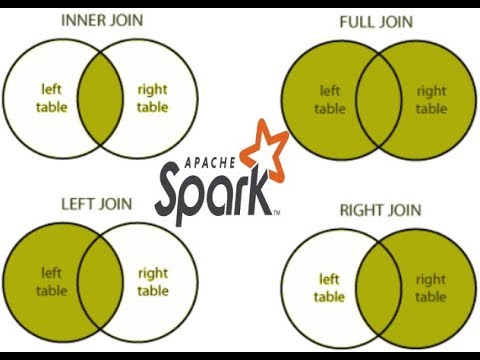

## Selection of a column

In [12]:
data.select("Country").show()

+----------+
|   Country|
+----------+
| Argentina|
| Australia|
|   Austria|
|   Belgium|
|   Bolivia|
|    Brazil|
|  Bulgaria|
|    Canada|
|     Chile|
|  Colombia|
|Costa Rica|
|   Croatia|
|   Czechia|
|   Denmark|
|   Ecuador|
|   Estonia|
|   Finland|
|    France|
|   Germany|
| Gibraltar|
+----------+
only showing top 20 rows



In [13]:
data.select("Country", "Total Library Size").show()

+----------+------------------+
|   Country|Total Library Size|
+----------+------------------+
| Argentina|              4760|
| Australia|              6114|
|   Austria|              5640|
|   Belgium|              4990|
|   Bolivia|              4991|
|    Brazil|              4972|
|  Bulgaria|              6797|
|    Canada|              6239|
|     Chile|              4994|
|  Colombia|              4991|
|Costa Rica|              4988|
|   Croatia|              2274|
|   Czechia|              7325|
|   Denmark|              4558|
|   Ecuador|              4992|
|   Estonia|              6456|
|   Finland|              4045|
|    France|              5445|
|   Germany|              5668|
| Gibraltar|              6167|
+----------+------------------+
only showing top 20 rows



In [ ]:
data.select("Country", "Total Library Size", "`No. of Movies`").show()

+----------+------------------+-------------+
|   Country|Total Library Size|No. of Movies|
+----------+------------------+-------------+
| Argentina|              4760|         1606|
| Australia|              6114|         2064|
|   Austria|              5640|         1861|
|   Belgium|              4990|         1616|
|   Bolivia|              4991|         1836|
|    Brazil|              4972|         1810|
|  Bulgaria|              6797|         1978|
|    Canada|              6239|         1928|
|     Chile|              4994|         1838|
|  Colombia|              4991|         1835|
|Costa Rica|              4988|         1836|
|   Croatia|              2274|          599|
|   Czechia|              7325|         2091|
|   Denmark|              4558|         1580|
|   Ecuador|              4992|         1837|
|   Estonia|              6456|         1970|
|   Finland|              4045|         1407|
|    France|              5445|         1841|
|   Germany|              5668|   

## Filter Operation

In [ ]:
data.filter(data["Total Library Size"] > 5000).show()

+------------+---------+------------------+---------------+-------------+--------------------------+-----------------------------+----------------------------+
|Country_code|  Country|Total Library Size|No. of TV Shows|No. of Movies|Cost Per Month - Basic ($)|Cost Per Month - Standard ($)|Cost Per Month - Premium ($)|
+------------+---------+------------------+---------------+-------------+--------------------------+-----------------------------+----------------------------+
|          au|Australia|              6114|           4050|         2064|                      7.84|                        12.12|                       16.39|
|          at|  Austria|              5640|           3779|         1861|                      9.03|                        14.67|                       20.32|
|          bg| Bulgaria|              6797|           4819|         1978|                      9.03|                        11.29|                       13.54|
|          ca|   Canada|              62

### Filtering Questions

In [ ]:
# Filter all the countries where the number of movies offered are > 2000
data.filter(data["`No. of Movies`"] > 2000).show()

+------------+--------------+------------------+---------------+-------------+--------------------------+-----------------------------+----------------------------+
|Country_code|       Country|Total Library Size|No. of TV Shows|No. of Movies|Cost Per Month - Basic ($)|Cost Per Month - Standard ($)|Cost Per Month - Premium ($)|
+------------+--------------+------------------+---------------+-------------+--------------------------+-----------------------------+----------------------------+
|          au|     Australia|              6114|           4050|         2064|                      7.84|                        12.12|                       16.39|
|          cz|       Czechia|              7325|           5234|         2091|                      8.83|                        11.49|                       14.15|
|          gi|     Gibraltar|              6167|           4079|         2088|                      9.03|                        14.67|                       20.32|
|         

Filter all the countries where the number of movies offered are > 2000 AND "Cost Per Month - Basic ($)" is greater than 8 per month

In [ ]:
# Filter all the countries where the number of movies offered are > 2000
data.filter((data["`Cost Per Month - Basic ($)`"] > 8) & (data["`No. of Movies`"] > 2000)).show()

+------------+-----------+------------------+---------------+-------------+--------------------------+-----------------------------+----------------------------+
|Country_code|    Country|Total Library Size|No. of TV Shows|No. of Movies|Cost Per Month - Basic ($)|Cost Per Month - Standard ($)|Cost Per Month - Premium ($)|
+------------+-----------+------------------+---------------+-------------+--------------------------+-----------------------------+----------------------------+
|          cz|    Czechia|              7325|           5234|         2091|                      8.83|                        11.49|                       14.15|
|          gi|  Gibraltar|              6167|           4079|         2088|                      9.03|                        14.67|                       20.32|
|          il|     Israel|              5713|           3650|         2063|                     10.56|                        15.05|                       19.54|
|          my|   Malaysia|  

In [ ]:
# Filter countries with library size > 5000
data.filter(data["Total Library Size"] > 5000).show()

+------------+---------+------------------+---------------+-------------+--------------------------+-----------------------------+----------------------------+
|Country_code|  Country|Total Library Size|No. of TV Shows|No. of Movies|Cost Per Month - Basic ($)|Cost Per Month - Standard ($)|Cost Per Month - Premium ($)|
+------------+---------+------------------+---------------+-------------+--------------------------+-----------------------------+----------------------------+
|          au|Australia|              6114|           4050|         2064|                      7.84|                        12.12|                       16.39|
|          at|  Austria|              5640|           3779|         1861|                      9.03|                        14.67|                       20.32|
|          bg| Bulgaria|              6797|           4819|         1978|                      9.03|                        11.29|                       13.54|
|          ca|   Canada|              62

In [ ]:
# Select countries with Premium plan cost < $15
data.filter(data["Cost Per Month - Premium ($)"] < 15).show()

+------------+---------+------------------+---------------+-------------+--------------------------+-----------------------------+----------------------------+
|Country_code|  Country|Total Library Size|No. of TV Shows|No. of Movies|Cost Per Month - Basic ($)|Cost Per Month - Standard ($)|Cost Per Month - Premium ($)|
+------------+---------+------------------+---------------+-------------+--------------------------+-----------------------------+----------------------------+
|          ar|Argentina|              4760|           3154|         1606|                      3.74|                          6.3|                        9.26|
|          bo|  Bolivia|              4991|           3155|         1836|                      7.99|                        10.99|                       13.99|
|          br|   Brazil|              4972|           3162|         1810|                      4.61|                         7.11|                        9.96|
|          bg| Bulgaria|              67

In [ ]:
# Filter for more TV shows than movies
data.filter(data["`No. of TV Shows`"] > data["`No. of Movies`"]).show()

+------------+----------+------------------+---------------+-------------+--------------------------+-----------------------------+----------------------------+
|Country_code|   Country|Total Library Size|No. of TV Shows|No. of Movies|Cost Per Month - Basic ($)|Cost Per Month - Standard ($)|Cost Per Month - Premium ($)|
+------------+----------+------------------+---------------+-------------+--------------------------+-----------------------------+----------------------------+
|          ar| Argentina|              4760|           3154|         1606|                      3.74|                          6.3|                        9.26|
|          au| Australia|              6114|           4050|         2064|                      7.84|                        12.12|                       16.39|
|          at|   Austria|              5640|           3779|         1861|                      9.03|                        14.67|                       20.32|
|          be|   Belgium|         

## Selection based on a condition

Print 1 for a condition otherwise 0

In [ ]:
# all coutries with
data.select("Country",
            F.when(data["Total Library Size"] < 7000 , 1).otherwise(0)
).show()

+----------+-------------------------------------------------------+
|   Country|CASE WHEN (Total Library Size < 7000) THEN 1 ELSE 0 END|
+----------+-------------------------------------------------------+
| Argentina|                                                      1|
| Australia|                                                      1|
|   Austria|                                                      1|
|   Belgium|                                                      1|
|   Bolivia|                                                      1|
|    Brazil|                                                      1|
|  Bulgaria|                                                      1|
|    Canada|                                                      1|
|     Chile|                                                      1|
|  Colombia|                                                      1|
|Costa Rica|                                                      1|
|   Croatia|                      

## Challenging Questions

1. Find the countries with the lowest no of movies offered and the higest.

2. Determine whether the countries are in the 1st, 2nd, 3rd or 4th quartile of the distribution of values in the no of movies column. We want a column that says 1,2,3, ocr 4 denoting those quartiles respectively

1. First Question

In [ ]:
# find min and max
data.describe('No_of_Movies').show()

+-------+------------------+
|summary|      No_of_Movies|
+-------+------------------+
|  count|                65|
|   mean|1795.4615384615386|
| stddev| 327.2797483099835|
|    min|               373|
|    max|              2387|
+-------+------------------+



In [ ]:
# can use either filtering or F.when to select the records
# (For Smartasses: Yes there is a way to get it by aggregating) but we haven't covered it yet
data.filter(data["No_of_Movies"] == 373).show()

+------------+----------+------------------+-------------+------------+--------------------------+-----------------------------+----------------------------+
|Country_code|   Country|Total Library Size|No_of_TVShows|No_of_Movies|Cost Per Month - Basic ($)|Cost Per Month - Standard ($)|Cost Per Month - Premium ($)|
+------------+----------+------------------+-------------+------------+--------------------------+-----------------------------+----------------------------+
|          sm|San Marino|              2310|         1937|         373|                      9.03|                        14.67|                       20.32|
+------------+----------+------------------+-------------+------------+--------------------------+-----------------------------+----------------------------+



In [ ]:
data.filter(data["No_of_Movies"] == 2387).show()

+------------+--------+------------------+-------------+------------+--------------------------+-----------------------------+----------------------------+
|Country_code| Country|Total Library Size|No_of_TVShows|No_of_Movies|Cost Per Month - Basic ($)|Cost Per Month - Standard ($)|Cost Per Month - Premium ($)|
+------------+--------+------------------+-------------+------------+--------------------------+-----------------------------+----------------------------+
|          my|Malaysia|              5952|         3565|        2387|                      8.29|                        10.65|                       13.02|
+------------+--------+------------------+-------------+------------+--------------------------+-----------------------------+----------------------------+



2. Second Question

Hey Nerds... yes I know you can use custom Lambda Functions to do this.. I get it you're smart.. while we cover them for the other mere mortals in the class in the next lecture, please contend with doing it in Lowly Earthly Peasantly Python

In [ ]:
# convert Spark to Python List
no_of_mov_raw = data.select("No_of_Movies").collect()

In [ ]:
# convert raw spark types to ints
no_of_mov = []
for i in no_of_mov_raw:
  no_of_mov.append(i[0])

In [ ]:
# get quartiles values for the list of ints
import statistics

# Calculate quartiles
q1, q2, q3 = statistics.quantiles(no_of_mov, n=4)

In [ ]:
# all coutries with
data.select("Country",
            F.when(data["No_of_Movies"] < 1622.0 , 1)
            .otherwise(
                F.when( (data["No_of_Movies"] > 1622.0) & (data["No_of_Movies"] < 1841.0), 2).otherwise(
                    F.when( (data["No_of_Movies"] > 1841.0) & (data["No_of_Movies"] < 1986.0), 3).otherwise(4)
                )
            ).alias("Q_of_movies")
).show()

In [ ]:
# all coutries with
data.select("Country",
            F.when(data["No_of_Movies"] < 1622.0 , 1)
            .otherwise(
                F.when( (data["No_of_Movies"] > 1622.0) & (data["No_of_Movies"] < 1841.0), 2).otherwise(
                    F.when( (data["No_of_Movies"] > 1841.0) & (data["No_of_Movies"] < 1986.0), 3).otherwise(4)
                )
            ).alias("Q_of_movies")
).show()

+----------+-----------+
|   Country|Q_of_movies|
+----------+-----------+
| Argentina|          1|
| Australia|          4|
|   Austria|          3|
|   Belgium|          1|
|   Bolivia|          2|
|    Brazil|          2|
|  Bulgaria|          3|
|    Canada|          3|
|     Chile|          2|
|  Colombia|          2|
|Costa Rica|          2|
|   Croatia|          1|
|   Czechia|          4|
|   Denmark|          1|
|   Ecuador|          2|
|   Estonia|          3|
|   Finland|          1|
|    France|          4|
|   Germany|          3|
| Gibraltar|          4|
+----------+-----------+
only showing top 20 rows



# Week 2

## Joining in Spark


Download this dataset https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset


and upload to the session storage in Colab

In [19]:
# Load the dataset
data_population = spark.read.csv("world_population.csv", header=True, inferSchema=True)

In [20]:
data_population.show()

+----+----+-------------------+----------------+-------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+----------+-----------------+-----------+---------------------------+
|Rank|CCA3|  Country/Territory|         Capital|    Continent|2022 Population|2020 Population|2015 Population|2010 Population|2000 Population|1990 Population|1980 Population|1970 Population|Area (km²)|Density (per km²)|Growth Rate|World Population Percentage|
+----+----+-------------------+----------------+-------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+----------+-----------------+-----------+---------------------------+
|  36| AFG|        Afghanistan|           Kabul|         Asia|       41128771|       38972230|       33753499|       28189672|       19542982|       10694796|       12486631|       10752971|    652230|          63.0587| 

## Sort

the dataframe by "World Population Percentage"

In [24]:
data_population.sort("World Population Percentage", ascending=False).show()

+----+----+-----------------+----------------+-------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+----------+-----------------+-----------+---------------------------+
|Rank|CCA3|Country/Territory|         Capital|    Continent|2022 Population|2020 Population|2015 Population|2010 Population|2000 Population|1990 Population|1980 Population|1970 Population|Area (km²)|Density (per km²)|Growth Rate|World Population Percentage|
+----+----+-----------------+----------------+-------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+----------+-----------------+-----------+---------------------------+
|   1| CHN|            China|         Beijing|         Asia|     1425887337|     1424929781|     1393715448|     1348191368|     1264099069|     1153704252|      982372466|      822534450|   9706961|         146.8933|        1

In [25]:
data_population.sort("Area (km²)", ascending=False).show()

+----+----+-----------------+----------------+-------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+----------+-----------------+-----------+---------------------------+
|Rank|CCA3|Country/Territory|         Capital|    Continent|2022 Population|2020 Population|2015 Population|2010 Population|2000 Population|1990 Population|1980 Population|1970 Population|Area (km²)|Density (per km²)|Growth Rate|World Population Percentage|
+----+----+-----------------+----------------+-------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+----------+-----------------+-----------+---------------------------+
|   9| RUS|           Russia|          Moscow|       Europe|      144713314|      145617329|      144668389|      143242599|      146844839|      148005704|      138257420|      130093010|  17098242|           8.4636|     0.99

## Download and upload to session.

This dataset as well. https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv

In [26]:
data_country_code = spark.read.csv("all.csv", header=True, inferSchema=True)

In [27]:
data_country_code.show()

+-------------------+-------+-------+------------+-------------+--------+--------------------+-------------------+-----------+---------------+------------------------+
|               name|alpha-2|alpha-3|country-code|   iso_3166-2|  region|          sub-region|intermediate-region|region-code|sub-region-code|intermediate-region-code|
+-------------------+-------+-------+------------+-------------+--------+--------------------+-------------------+-----------+---------------+------------------------+
|        Afghanistan|     AF|    AFG|           4|ISO 3166-2:AF|    Asia|       Southern Asia|               NULL|        142|             34|                    NULL|
|      Åland Islands|     AX|    ALA|         248|ISO 3166-2:AX|  Europe|     Northern Europe|               NULL|        150|            154|                    NULL|
|            Albania|     AL|    ALB|           8|ISO 3166-2:AL|  Europe|     Southern Europe|               NULL|        150|             39|                  

## Joining

join the two dataframe on the CCA3 and alpha-3 columns

In [31]:
data_population_to_be_joined = data_population.join(
    data_country_code,
    data_population['CCA3'] == data_country_code['alpha-3'],
    'inner'
)

In [40]:
data_population_to_be_joined.show()

+----+----+-------------------+----------------+-------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+----------+-----------------+-----------+---------------------------+-------------------+-------+-------+------------+-------------+--------+--------------------+-------------------+-----------+---------------+------------------------+
|Rank|CCA3|  Country/Territory|         Capital|    Continent|2022 Population|2020 Population|2015 Population|2010 Population|2000 Population|1990 Population|1980 Population|1970 Population|Area (km²)|Density (per km²)|Growth Rate|World Population Percentage|               name|alpha-2|alpha-3|country-code|   iso_3166-2|  region|          sub-region|intermediate-region|region-code|sub-region-code|intermediate-region-code|
+----+----+-------------------+----------------+-------------+---------------+---------------+---------------+---------------+---------------+------

## WithColoumn

WithColoumn is used to create a new col based on some logic in the existing columns or external factors.  

Capitalise the country code and create a new column 'CC_Capitals'

In [38]:
# Capitalise the
caps = data.withColumn(
    "CC_Capitals",
    F.upper(data["Country_code"])
)

# Display result
caps.show()

+------------+----------+------------------+-------------+------------+--------------------------+-----------------------------+----------------------------+-----------+
|Country_code|   Country|Total Library Size|No_of_TVShows|No_of_Movies|Cost Per Month - Basic ($)|Cost Per Month - Standard ($)|Cost Per Month - Premium ($)|CC_Capitals|
+------------+----------+------------------+-------------+------------+--------------------------+-----------------------------+----------------------------+-----------+
|          ar| Argentina|              4760|         3154|        1606|                      3.74|                          6.3|                        9.26|         AR|
|          au| Australia|              6114|         4050|        2064|                      7.84|                        12.12|                       16.39|         AU|
|          at|   Austria|              5640|         3779|        1861|                      9.03|                        14.67|                      

## Join

https://i.ytimg.com/vi/Sh4ENyItXK8/hqdefault.jpg

Join the capitalised dataframe with the population dataframe on the CC_Capitals and alpha-2 columns.


a small intro to joins is given in the pic

name the df "netflix_data_with_populations"

In [44]:
netflix_data_with_populations = caps.join(
    data_population_to_be_joined,
    caps['CC_Capitals'] == data_population_to_be_joined['alpha-2'],
    'inner'
)

In [46]:
netflix_data_with_populations.count()

65

## Aggregating functions

1.   Find the average population min and max in each continent using agg and grouby
2.   Find out using dataframe ops how to get the max value of a col



In [49]:
continent_population = data_population_to_be_joined.groupBy(
    F.col("Continent")
).agg(
    F.avg("2022 Population").alias('Population Avg'),
    F.min("2022 Population").alias('Population min'),
    F.max("2022 Population").alias('Population max'),
).show()

+-------------+--------------------+--------------+--------------+
|    Continent|      Population Avg|Population min|Population max|
+-------------+--------------------+--------------+--------------+
|       Europe|       1.486295076E7|           510|     144713314|
|       Africa|2.5030367228070177E7|        107118|     218541212|
|North America|        1.50074034E7|          4390|     338289857|
|South America|3.1201186285714287E7|          3780|     215313498|
|      Oceania|           1958198.0|          1871|      26177413|
|         Asia|       9.442766548E7|        449002|    1425887337|
+-------------+--------------------+--------------+--------------+





For the above dataframe see how many countries in each continent as well

In [50]:
continent_population = data_population_to_be_joined.groupBy(
    F.col("Continent")
).agg(
    F.avg("2022 Population").alias('Population Avg'),
    F.min("2022 Population").alias('Population min'),
    F.max("2022 Population").alias('Population max'),
    F.count("name").alias('Country Count'),
).show()

+-------------+--------------------+--------------+--------------+-------------+
|    Continent|      Population Avg|Population min|Population max|Country Count|
+-------------+--------------------+--------------+--------------+-------------+
|       Europe|       1.486295076E7|           510|     144713314|           50|
|       Africa|2.5030367228070177E7|        107118|     218541212|           57|
|North America|        1.50074034E7|          4390|     338289857|           40|
|South America|3.1201186285714287E7|          3780|     215313498|           14|
|      Oceania|           1958198.0|          1871|      26177413|           23|
|         Asia|       9.442766548E7|        449002|    1425887337|           50|
+-------------+--------------------+--------------+--------------+-------------+



## Challenging Tasks

for the netflix_data_with_populations dataframe,

1.   Find the average population min and max in each continent using agg and grouby
2.   Find out using dataframe ops how to get the max value of a col
3.   For this dataframe see how many countries in each continent as well
4. why is there a difference in the no of countries

In [52]:
continent_population = netflix_data_with_populations.groupBy(
    F.col("Continent")
).agg(
    F.avg("2022 Population").alias('Population Avg'),
    F.min("2022 Population").alias('Population min'),
    F.max("2022 Population").alias('Population max'),
    F.count("name").alias('Country Count'),
).show()

+-------------+--------------------+--------------+--------------+-------------+
|    Continent|      Population Avg|Population min|Population max|Country Count|
+-------------+--------------------+--------------+--------------+-------------+
|       Europe|2.0960307411764707E7|         32649|     144713314|           34|
|       Africa|         5.9893885E7|      59893885|      59893885|            1|
|North America|         8.9617651E7|       5180829|     338289857|            6|
|South America|        4.35081505E7|       3422794|     215313498|           10|
|      Oceania|        1.56813505E7|       5185288|      26177413|            2|
|         Asia|        1.85114481E8|       5975689|    1417173173|           12|
+-------------+--------------------+--------------+--------------+-------------+



# Do try to answer other interesting questions using the combined df you have made.